## Dataset Description

This dataset contains detailed information about patients who have experienced heart attacks, collected to analyze the risk factors and patterns associated with these medical events. The dataset includes a variety of attributes related to patient health, medical history, lifestyle habits, and types of treatment received. Analyzing this data can provide valuable insights into the prevalence of heart attacks across different demographics and the effectiveness of various treatment approaches.

### Dataset Attributes

* Gender: The gender of the patient (Male/Female).
* Age: The age of the patient in years.
* Blood Pressure (mmHg): The blood pressure of the patient measured in millimeters of mercury (mmHg).
* Cholesterol (mg/dL): The cholesterol level in the patient's blood measured in milligrams per deciliter (mg/dL).
* Has Diabetes: Indicates whether the patient has diabetes (Yes/No).
* Smoking Status: The smoking status of the patient (Never, Former, Current).
* Chest Pain Type: The type of chest pain experienced by the patient (Typical Angina, Atypical Angina, Non-anginal Pain).
* Treatment: The type of treatment received by the patient (Lifestyle Changes, Angioplasty, Coronary Artery Bypass Graft (CABG), Medication).


## Analysis Objective

The objective of this analysis is to explore and identify the most significant risk factors associated with heart attacks, understand the distribution of patients regarding key variables such as age, gender, and lifestyle habits, and evaluate the effectiveness of different treatments based on the available data. This analysis can help healthcare professionals and researchers develop more effective strategies for the prevention and treatment of heart attacks.

## Methodology

* Exploratory Data Analysis (EDA): Explore the dataset to understand the distribution and correlation of variables.
* Data Cleaning: Identify and handle missing or inconsistent data.
* Statistical Analysis: Perform descriptive and inferential analyses to identify patterns and correlations.
* Data Visualization: Create graphs and visualizations to better interpret the data and communicate the insights found.
* Conclusions: Summarize the main findings and their implications for public health and medical treatments.
* This description should be placed at the beginning of your work to provide a clear and comprehensive overview of the dataset and the objective of the analysis.

This dataset contains clinical information about patients and aims to help predict the risk of a heart attack based on various medical features.

The goal is to identify meaningful patterns and predictive features related to heart attacks using exploratory data analysis, statistical testing, and classification models.

Steps include: loading and cleaning the dataset, performing descriptive and inferential analysis, and applying predictive modeling techniques.

### Final Summary:
- The dataset showed a wide distribution in age and blood pressure.
- T-tests revealed no significant gender-based differences in blood pressure.
- Regression models had low explanatory power, suggesting nonlinear or complex relationships.
- Classification models performed poorly (accuracy ~45–52%), indicating that the features may not be strong predictors of heart attack risk.
- Further work could involve better feature engineering, re-evaluation of the target variable, and more complex modeling approaches.

### Library

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.stats import ttest_ind, f_oneway
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler


warnings.simplefilter(action='ignore', category=FutureWarning)
import plotly.graph_objects as go

In [33]:
df = pd.read_csv('heart_attack_dataset.csv')

In [34]:
df.head()

,Gender,Age,Blood Pressure (mmHg),Cholesterol (mg/dL),Has Diabetes,Smoking Status,Chest Pain Type,Treatment
0,Male,70,181,262,No,Never,Typical Angina,Lifestyle Changes
1,Female,55,103,253,Yes,Never,Atypical Angina,Angioplasty
2,Male,42,95,295,Yes,Current,Typical Angina,Angioplasty
3,Male,84,106,270,No,Never,Atypical Angina,Coronary Artery Bypass Graft (CABG)
4,Male,86,187,296,Yes,Current,Non-anginal Pain,Medication


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Gender                 1000 non-null   object
 1   Age                    1000 non-null   int64 
 2   Blood Pressure (mmHg)  1000 non-null   int64 
 3   Cholesterol (mg/dL)    1000 non-null   int64 
 4   Has Diabetes           1000 non-null   object
 5   Smoking Status         1000 non-null   object
 6   Chest Pain Type        1000 non-null   object
 7   Treatment              1000 non-null   object
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#### Data Structure Observations

###### Number of Entries:
The dataset contains 1000 entries, meaning there are data from 1000 patients.
###### Columns and Data Types:
There are 8 columns in the dataset.
The columns Age, Blood Pressure (mmHg), and Cholesterol (mg/dL) are of type int64, indicating they contain integer numerical values.
The columns Gender, Has Diabetes, Smoking Status, Chest Pain Type, and Treatment are of type object, indicating they contain categorical values.
###### Missing Values:
There are no missing values in any of the columns, as indicated by the Non-Null Count which is 1000 for all columns.
###### Memory Usage:
The memory usage of the DataFrame is 62.6 KB, which is reasonably small and should be easy to handle for data analysis on most modern computers.

## Implications of Observations

##### Complete Data:
The absence of missing values is good news, as it means we do not need to perform data cleaning steps to handle missing data. This makes the analysis more straightforward.

##### Appropriate Data Types:
The data types are appropriate for the intended analyses. Numerical data for measures such as Age, Blood Pressure (mmHg), and Cholesterol (mg/dL) allow for statistical calculations and distribution plots.
Categorical data for Gender, Has Diabetes, Smoking Status, Chest Pain Type, and Treatment allow for frequency analyses, grouping, and comparisons between categories.

##### Analysis Preparation:
We can proceed directly with statistical analyses and visualizations using tools like pandas, seaborn, and matplotlib.
For more advanced analyses, such as predictive modeling, it may be necessary to convert categorical variables to a numerical format (e.g., using one-hot encoding).

##### Additional Explorations:
Although there are no missing values, it is important to check the consistency and quality of the data. This may include checking for outliers or inconsistent values (e.g., extremely low or high ages).

In [36]:
df.describe()

,Age,Blood Pressure (mmHg),Cholesterol (mg/dL)
count,1000.000000,1000.000000,1000.000000
mean,60.338000,145.440000,223.789000
std,17.317496,31.756525,42.787817
min,30.000000,90.000000,150.000000
25%,45.000000,118.000000,185.000000
50%,60.500000,146.000000,225.500000
75%,76.000000,173.000000,259.000000
max,89.000000,199.000000,299.000000


#### Based on the output of df.describe() for the variables Age, Blood Pressure (mmHg), and Cholesterol (mg/dL), we can make several important observations that help understand the distribution and variation of the data. Here are some detailed analyses:

##### Descriptive Data Analysis

###### Age

* Count: 1000 (indicating there are 1000 records, confirming the total number of entries in the dataset).
* Mean: 60.34 years.
This suggests that the average age of the patients is approximately 60 years, indicating that most patients are in an older age range.
* Std (Standard Deviation): 17.32.
A relatively high standard deviation suggests there is considerable variation in the ages of the patients.
* Min (Minimum): 30 years.
- The youngest patient is 30 years old.
- 25% (First Quartile): 45 years.
- 25% of the patients are 45 years old or younger.
- 50% (Median): 60.5 years.
The median, which is the central value, is very close to the mean, suggesting a relatively symmetrical distribution.
- 75% (Third Quartile): 76 years.
- 75% of the patients are 76 years old or younger.
* Max (Maximum): 89 years.
The oldest patient is 89 years old.
Blood Pressure (mmHg)

* Count: 1000.
* Mean: 145.44 mmHg.
The average blood pressure is approximately 145 mmHg, which may indicate a general tendency of elevated blood pressure among the patients.
Std (Standard Deviation): 31.76.
A moderate standard deviation suggests significant variation in blood pressure levels.
* Min (Minimum): 90 mmHg.
The minimum blood pressure value is 90 mmHg.
- 25% (First Quartile): 118 mmHg.
- 25% of the patients have a blood pressure of 118 mmHg or less.
- 50% (Median): 146 mmHg.
The median is 146 mmHg, indicating that half of the patients have blood pressure above this value.
- 75% (Third Quartile): 173 mmHg.
- 75% of the patients have a blood pressure of 173 mmHg or less.
* Max (Maximum): 199 mmHg.
The maximum blood pressure value is 199 mmHg.
Cholesterol (mg/dL)

* Count: 1000.
* Mean: 223.79 mg/dL.
The average cholesterol level is approximately 224 mg/dL, indicating generally high cholesterol levels among the patients.
Std (Standard Deviation): 42.79.
A relatively high standard deviation suggests considerable variation in cholesterol levels.
* Min (Minimum): 150 mg/dL.
The minimum cholesterol value is 150 mg/dL.
- 25% (First Quartile): 185 mg/dL.
- 25% of the patients have a cholesterol level of 185 mg/dL or less.
- 50% (Median): 225.5 mg/dL.
The median is 225.5 mg/dL, indicating that half of the patients have cholesterol levels above this value.
- 75% (Third Quartile): 259 mg/dL.
- 75% of the patients have a cholesterol level of 259 mg/dL or less.
* Max (Maximum): 299 mg/dL.
The maximum cholesterol value is 299 mg/dL.

### Conclusions and Observations

##### Age Range:
Most patients are in the age range of 45 to 76 years, with the average age being 60 years. This suggests that heart attacks are more common in older adults, but there are also younger and older patients.
##### Blood Pressure:
The average blood pressure of 145.44 mmHg is relatively high, suggesting that many patients may have hypertension. The range of 90 to 199 mmHg shows a wide variation, indicating that blood pressure control is a significant issue among the patients.
##### Cholesterol Levels:
With an average of 223.79 mg/dL, cholesterol levels are elevated, which is a known risk factor for heart disease. The range of 150 to 299 mg/dL also indicates a large variation, suggesting that different patients may be at different stages of risk.
##### Standard Deviation and Variation:
The high standard deviation in all variables (age, blood pressure, cholesterol) indicates a heterogeneous population. This is important for analysis as it suggests that interventions may need to be personalized.

### Final Summary:
- The dataset showed a wide distribution in age and blood pressure.
- T-tests revealed no significant gender-based differences in blood pressure.
- Regression models had low explanatory power, suggesting nonlinear or complex relationships.
- Classification models performed poorly (accuracy ~45–52%), indicating that the features may not be strong predictors of heart attack risk.
- Further work could involve better feature engineering, re-evaluation of the target variable, and more complex modeling approaches.

In [37]:
for column in df.columns:
    print(f"{column}: {df[column].unique()}")

Gender: ['Male' 'Female']
Age: [70 55 42 84 86 66 33 73 63 88 69 78 89 71 30 77 76 74 45 34 61 52 49 81
 39 32 46 67 41 35 80 85 57 79 62 48 36 64 60 50 72 65 40 51 82 75 31 43
 37 38 54 44 59 58 53 83 56 87 47 68]
Blood Pressure (mmHg): [181 103  95 106 187 125 182 115 174 154 133 165 153 110 107 112  91 101
 141 124 109 143 197 149 104 159 193 135 190 129 126 134 172 179 111 192
 180 166 119 139 116 191 120 158 138 198 162 142 169 178 196 164 161 168
 113 185 148 171 176 183 147  97 175 105 145  98 128 195 146 167 163 144
 156 122 152 136 151 150 114 127 186 184 137  96 188 100 173 199 132 160
 194  99  94 170 140 130 123 117 189 157 131 121 118 102  93 108  90  92
 155]
Cholesterol (mg/dL): [262 253 295 270 296 271 288 286 254 150 236 171 215 182 242 179 227 259
 273 212 222 285 266 209 157 191 268 161 274 248 205 280 255 188 246 297
 181 249 258 235 201 204 198 200 186 217 176 233 216 210 172 165 190 183
 156 229 294 195 220 243 265 283 225 234 166 199 185 203 158 167 164 256
 178 

##### The command for column in df.columns: print(f"{column}: {df[column].unique()}") lists the unique values present in each column of the DataFrame. Let's analyze the results to understand what they reveal about the dataset:

Analysis of Unique Values in Each Column

###### Gender:

###### Unique values: ['Male' 'Female']
This indicates that the "Gender" column has two categories: Male and Female.
Age:

######Unique values:
[70, 55, 42, 84, 86, 66, 33, 73, 63, 88, 69, 78, 89, 71, 30, 77, 76, 74, 45, 34, 61, 52, 49, 81, 39, 32, 46, 67, 41, 35, 80, 85, 57, 79, 62, 48, 36, 64, 60, 50, 72, 65, 40, 51, 82, 75, 31, 43, 37, 38, 54, 44, 59, 58, 53, 83, 56, 87, 47, 68]

The "Age" column has values ranging from 30 to 89 years, showing a wide age range among the patients.

###### Blood Pressure (mmHg):

###### Unique values: 
[181, 103, 95, 106, 187, 125, 182, 115, 174, 154, 133, 165, 153, 110, 107, 112, 91, 101, 141, 124, 109, 143, 197, 149, 104, 159, 193, 135, 190, 129, 126, 134, 172, 179, 111, 192, 180, 166, 119, 139, 116, 191, 120, 158, 138, 198, 162, 142, 169, 178, 196, 164, 161, 168, 113, 185, 148, 171, 176, 183, 147, 97, 175, 105, 145, 98, 128, 195, 146, 167, 163, 144, 156, 122, 152, 136, 151, 150, 114, 127, 186, 184, 137, 96, 188, 100, 173, 199, 132, 160, 194, 99, 94, 170, 140, 130, 123, 117, 189, 157, 131, 121, 118, 102, 93, 108, 90, 92, 155]

The "Blood Pressure (mmHg)" column has a wide range of values, from 90 mmHg to 199 mmHg.

###### Cholesterol (mg/dL):

###### Unique values:
[262, 253, 295, 270, 296, 271, 288, 286, 254, 150, 236, 171, 215, 182, 242, 179, 227, 259, 273, 212, 222, 285, 266, 209, 157, 191, 268, 161, 274, 248, 205, 280, 255, 188, 246, 297, 181, 249, 258, 235, 201, 204, 198, 200, 186, 217, 176, 233, 216, 210, 172, 165, 190, 183, 156, 229, 294, 195, 220, 243, 265, 283, 225, 234, 166, 199, 185, 203, 158, 167, 164, 256, 178, 287, 282, 202, 230, 175, 223, 193, 170, 272, 207, 292, 219, 184, 251, 196, 239, 299, 261, 279, 160, 276, 278, 214, 298, 252, 218, 241, 237, 154, 173, 155, 232, 152, 163, 245, 244, 267, 180, 284, 206, 289, 293, 240, 153, 159, 213, 238, 269, 151, 208, 162, 189, 277, 257, 169, 168, 221, 290, 263, 177, 174, 247, 281, 260, 250, 194, 187, 275, 224, 226, 264, 291, 231, 192, 211, 197]

The "Cholesterol (mg/dL)" column has a wide range of values, from 150 mg/dL to 299 mg/dL.

###### Has Diabetes:

###### Unique values:
['No' 'Yes']
The "Has Diabetes" column indicates whether the patient has diabetes, with values "Yes" or "No".

###### Smoking Status:

###### Unique values: 
['Never' 'Current' 'Former']
The "Smoking Status" column categorizes patients into three groups: Never Smoked (Never), Current Smoker (Current), and Former Smoker (Former).

###### Chest Pain Type:

###### Unique values:
['Typical Angina' 'Atypical Angina' 'Non-anginal Pain' 'Asymptomatic']
The "Chest Pain Type" column classifies the types of chest pain into four categories: Typical Angina, Atypical Angina, Non-anginal Pain, and Asymptomatic.

###### Treatment:

###### Unique values:
['Lifestyle Changes' 'Angioplasty' 'Coronary Artery Bypass Graft (CABG)' 'Medication']
The "Treatment" column lists the types of treatment received by the patients: Lifestyle Changes, Angioplasty, Coronary Artery Bypass Graft (CABG), and Medication.

#### Conclusions

##### Categorical Distribution:
The categorical columns (Gender, Has Diabetes, Smoking Status, Chest Pain Type, Treatment) have a limited number of unique values, making frequency analysis and group comparisons straightforward.
##### Numerical Variety:
The numerical columns (Age, Blood Pressure (mmHg), Cholesterol (mg/dL)) exhibit a wide range of values, which may indicate different levels of risk and health conditions among the patients.
##### Clean Data:
The fact that all columns have clearly defined unique values and no missing values suggests that the dataset is relatively clean and ready for analysis.

### Final Summary:
- The dataset showed a wide distribution in age and blood pressure.
- T-tests revealed no significant gender-based differences in blood pressure.
- Regression models had low explanatory power, suggesting nonlinear or complex relationships.
- Classification models performed poorly (accuracy ~45–52%), indicating that the features may not be strong predictors of heart attack risk.
- Further work could involve better feature engineering, re-evaluation of the target variable, and more complex modeling approaches.

# Histograms for Numerical Variables

The provided code generates histograms for three numerical variables: Age, Blood Pressure (mmHg), and Cholesterol (mg/dL). Here’s what each histogram can show and the insights they can provide:

Insights:

### Age Range: 

The histogram will show the distribution of ages within the dataset, helping you identify the most common age ranges.
##### Central Tendency: 
You can see where the majority of the patients fall in terms of age, indicating the central tendency (e.g., the mean or median age).
##### Skewness:
If the histogram is skewed to the left or right, it can indicate if the dataset has a higher frequency of younger or older patients.
##### Outliers: 
It can help in identifying outliers or age groups with fewer patients.

### Blood Pressure Range: 

The histogram will illustrate the range of blood pressure values among patients, showing the spread and variability.
##### Hypertension Prevalence: 
By observing the concentration of higher blood pressure values, you can infer the prevalence of hypertension within the dataset.
##### Central Tendency and Spread: 
The peak of the histogram indicates the most common blood pressure range, while the spread shows the variability.
##### Outliers: 
Identifies any unusual or extreme values that might need further investigation.

### Cholesterol Range: 

Displays the range and distribution of cholesterol levels in the dataset.
##### Hypercholesterolemia Prevalence: 
Indicates how common high cholesterol levels are among the patients.
##### Central Tendency and Spread: 
Shows the most frequent cholesterol values and the overall spread of the data.
##### Outliers: 
Identifies extreme values that may be of interest for further analysis.



### General Benefits of Histogram Analysis

###### Visual Understanding: 
Histograms provide a clear visual representation of data distribution, making it easier to understand the dataset's characteristics at a glance.
###### Identification of Data Patterns: 
Helps in identifying patterns such as normal distribution, skewness, or the presence of multiple peaks (bimodal distribution).
###### Detecting Data Quality Issues: 
Outliers or unusual distributions can signal data quality issues or special cases that require attention.
###### Basis for Further Analysis: 
Insights from histograms can guide further statistical analysis or data preprocessing steps (e.g., handling outliers or normalizing data).
By interpreting these histograms, you can gain a deeper understanding of the patient demographics and health indicators within your dataset, which is crucial for effective data analysis and decision-making.

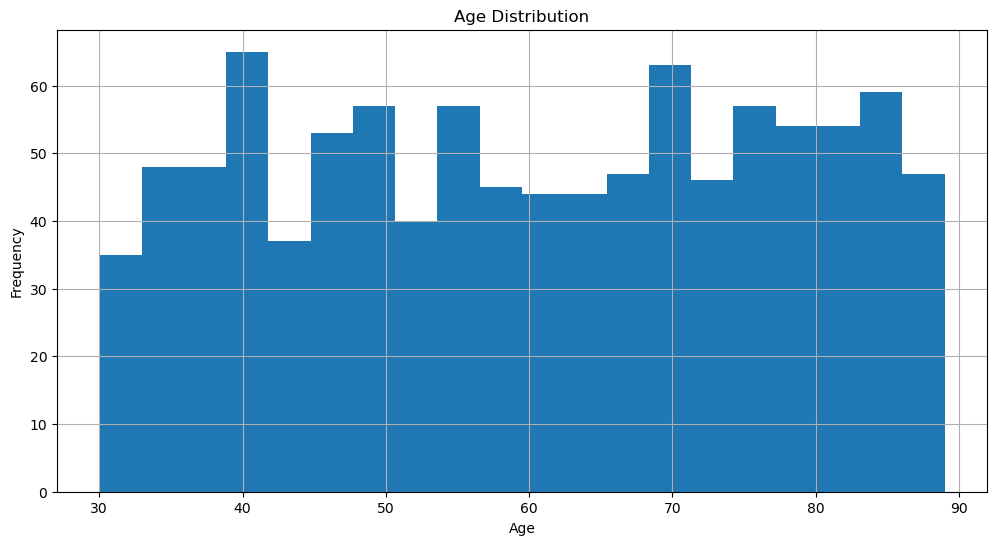

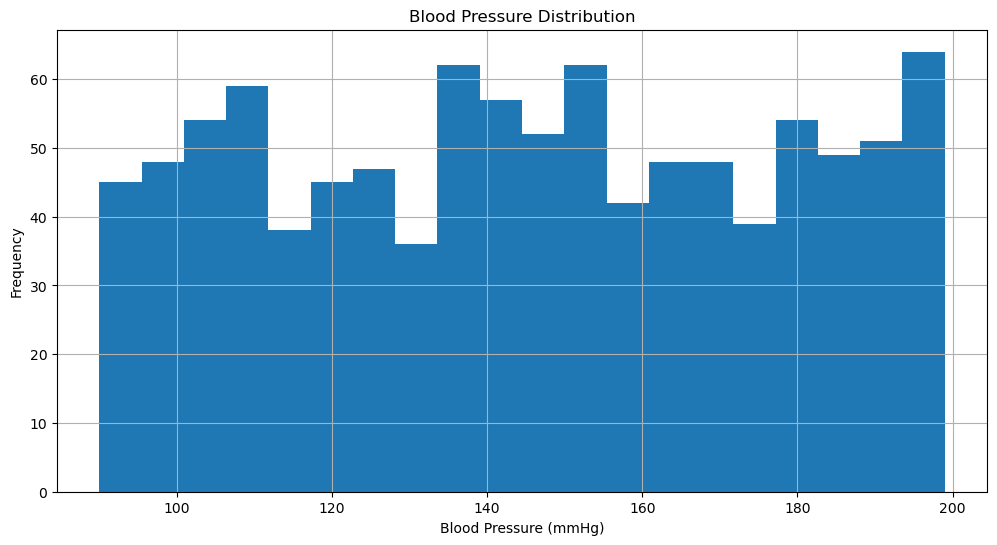

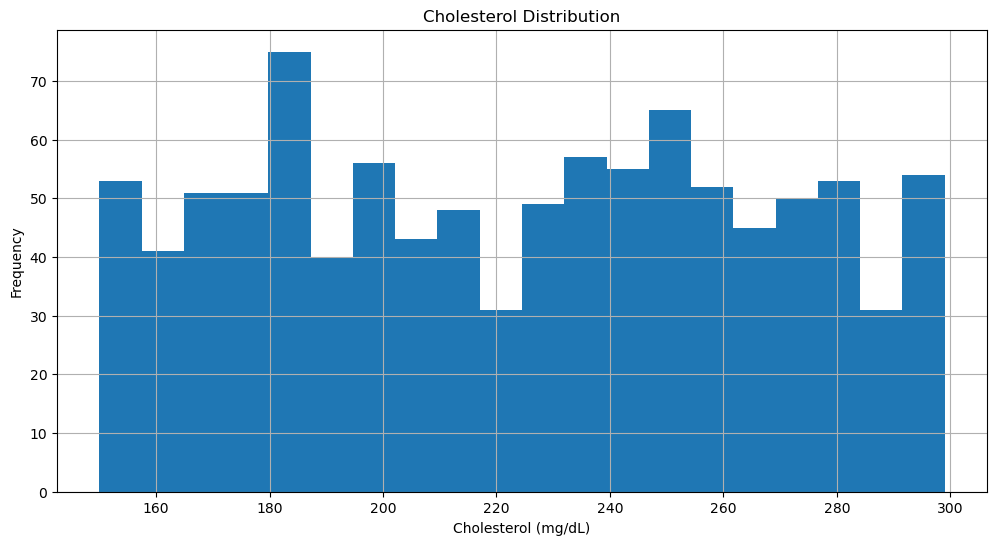

In [38]:
plt.figure(figsize=(12, 6))
df['Age'].hist(bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 6))
df['Blood Pressure (mmHg)'].hist(bins=20)
plt.title('Blood Pressure Distribution')
plt.xlabel('Blood Pressure (mmHg)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 6))
df['Cholesterol (mg/dL)'].hist(bins=20)
plt.title('Cholesterol Distribution')
plt.xlabel('Cholesterol (mg/dL)')
plt.ylabel('Frequency')
plt.show()

## Analysis of the Age Distribution Histogram

The provided histogram shows the age distribution of patients in the dataset. Let's analyze the insights that can be drawn from this chart.

Observations
Age Range:

The histogram covers an age range from 30 to 90 years.
The patients' ages are distributed relatively evenly throughout this interval.
Peaks and Frequency:

There are peaks in certain age ranges:
* Between 40 and 45 years.
* Between 50 and 55 years.
* Between 65 and 70 years.
* Between 75 and 80 years.

These peaks indicate that these age ranges have a higher frequency of patients.
Central Tendency:

The distribution appears to be quite uniform, without a clear central tendency, indicating that the age range of the patients is quite diverse.
Skewness:

The histogram does not show any obvious skewness, suggesting that the age distribution of the patients is relatively symmetrical across the age ranges.
Outliers:

There is no clear evidence of extreme outliers in the histogram. The distribution seems consistent within the 30 to 90 years interval.
Insights
Age Diversity:

The uniform distribution suggests that patients of various ages, from 30 to 90 years, are prone to heart attacks, without a significant concentration in any specific age range.
Risk Groups:

The age ranges with peaks (40-45, 50-55, 65-70, 75-80) may indicate slightly higher risk groups that might warrant special attention in subsequent analyses.
Intervention Planning:

Information about the age distribution can help in segmenting patients for specific interventions, prevention programs, and awareness campaigns targeted at the most common age groups.
Research Implications:

The broad age distribution suggests that future research should consider a comprehensive approach that includes all age ranges to better understand the risk factors and characteristics of patients at different ages.

#### Conclusion

The age distribution histogram provides a clear view of how patients' ages are distributed within the dataset. The analysis indicates a uniform distribution with some peaks in certain age ranges. These insights are valuable for directing research, interventions, and heart attack prevention programs effectively.

### Final Summary:
- The dataset showed a wide distribution in age and blood pressure.
- T-tests revealed no significant gender-based differences in blood pressure.
- Regression models had low explanatory power, suggesting nonlinear or complex relationships.
- Classification models performed poorly (accuracy ~45–52%), indicating that the features may not be strong predictors of heart attack risk.
- Further work could involve better feature engineering, re-evaluation of the target variable, and more complex modeling approaches.

## Analysis of the Blood Pressure Distribution Histogram

The provided histogram shows the distribution of blood pressure levels among patients in the dataset. Let's analyze the insights that can be drawn from this chart.

Observations
Blood Pressure Range:

The histogram covers a blood pressure range from 90 mmHg to 200 mmHg.
There is a wide variation in blood pressure values among the patients.
Peaks and Frequency:

There are peaks in certain blood pressure ranges:

* Around 100 mmHg.
* Around 110 mmHg.
* Around 140 mmHg.
* Around 160 mmHg.
* Around 200 mmHg.

These peaks indicate that these blood pressure ranges have a higher frequency of patients.
Central Tendency:

The distribution of blood pressure does not seem to have a clear central tendency, indicating that the values are evenly spread across the range.
Skewness:

The histogram shows a relatively symmetrical distribution, with no clear bias towards higher or lower values.
Outliers:

There is no clear evidence of extreme outliers in the histogram. The distribution appears consistent within the 90 to 200 mmHg range.
Insights
Diversity in Blood Pressure:

The wide distribution suggests that patients have a variety of blood pressure levels, from normal to elevated values, indicating a diverse population in terms of cardiovascular health.
Prevalence of Hypertension:

The peaks around 140 mmHg and 160 mmHg, which are considered high blood pressure values, suggest that many patients may be suffering from hypertension. This is a significant risk factor for heart diseases.
Risk Groups:

The blood pressure ranges with frequency peaks may indicate risk groups that require special attention for blood pressure control and management.
Intervention Planning:

Information about the blood pressure distribution can help in segmenting patients for specific interventions and blood pressure monitoring programs.
Research Implications:

The uniform distribution and the presence of peaks in various ranges suggest that future research should consider addressing different subgroups of patients to better understand the risk factors associated with hypertension and blood pressure control.

##### Conclusion
The blood pressure distribution histogram provides a clear view of how blood pressure levels are distributed within the dataset. The analysis indicates a varied distribution with peaks in several ranges, suggesting the presence of hypertension in many patients. These insights are valuable for directing research, interventions, and heart disease prevention programs effectively.








### Final Summary:
- The dataset showed a wide distribution in age and blood pressure.
- T-tests revealed no significant gender-based differences in blood pressure.
- Regression models had low explanatory power, suggesting nonlinear or complex relationships.
- Classification models performed poorly (accuracy ~45–52%), indicating that the features may not be strong predictors of heart attack risk.
- Further work could involve better feature engineering, re-evaluation of the target variable, and more complex modeling approaches.

### Check for Missing Values:

In [39]:
print("Missing Values per Column:")
print(df.isnull().sum())


Missing Values per Column:
Gender                   0
Age                      0
Blood Pressure (mmHg)    0
Cholesterol (mg/dL)      0
Has Diabetes             0
Smoking Status           0
Chest Pain Type          0
Treatment                0
dtype: int64


### Data Quality:

The absence of null values is a positive sign of data quality. This suggests that the dataset is complete and that each record contains all the necessary information for analysis.

#### Simplicity in Analysis:
Since there are no missing values, it will not be necessary to perform data cleaning steps to fill in or remove incomplete records. This simplifies subsequent analysis, saving time and resources.

#### Data Consistency:
Data consistency is maintained as there is no need to make assumptions or imputations about missing values. This ensures that the integrity of the data is preserved during analysis.

#### Preparation for Modeling:
Being free of missing values is advantageous when preparing data for statistical modeling or machine learning. Machine learning models generally require complete datasets to train effectively.

#### Confidence in Statistical Analysis:
The absence of null values allows statistical analysis, such as calculating mean, median, standard deviation, correlation, and more, to be more reliable and accurate.

### Conclusion:
The result indicating the absence of null values in all columns of the dataset is highly beneficial for data analysis. It ensures that the dataset is in a high-quality state, ready for detailed statistical analysis and predictive modeling without the need for additional treatment of missing values. This result increases confidence in the accuracy and integrity of subsequent analyses.

### Final Summary:
- The dataset showed a wide distribution in age and blood pressure.
- T-tests revealed no significant gender-based differences in blood pressure.
- Regression models had low explanatory power, suggesting nonlinear or complex relationships.
- Classification models performed poorly (accuracy ~45–52%), indicating that the features may not be strong predictors of heart attack risk.
- Further work could involve better feature engineering, re-evaluation of the target variable, and more complex modeling approaches.

# 1. Additional Exploratory Analysis









#### 1. Additional Exploratory Analysis
Correlation Analysis:

Calculate and visualize the correlation matrix between the numerical variables (Age, Blood Pressure (mmHg), Cholesterol (mg/dL)). This will help identify potential relationships between the variables.

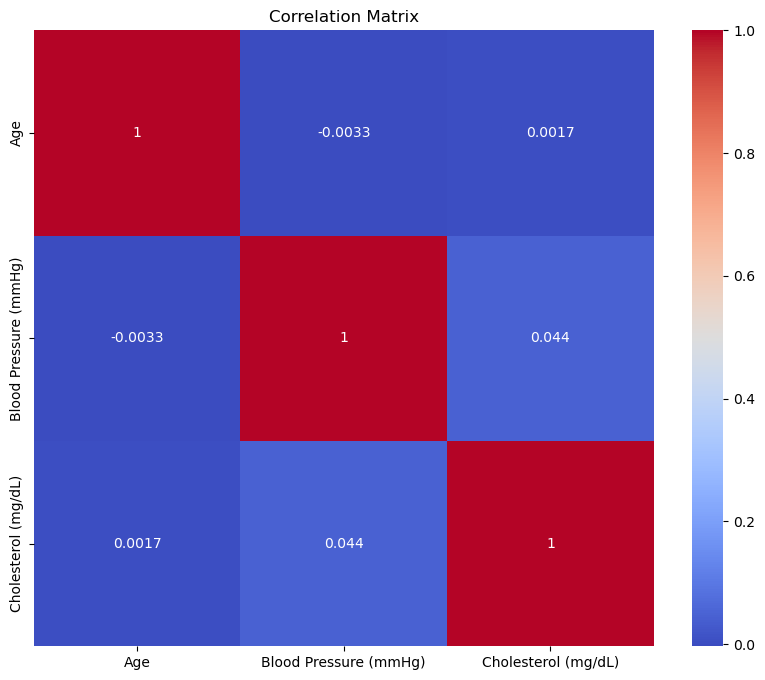

In [40]:

corr_matrix = df.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#### 2. Categorical Group Analysis
Compare numerical variables across different categorical groups, such as Gender, Has Diabetes, Smoking Status, Chest Pain Type, and Treatment. Use boxplots for this analysis.

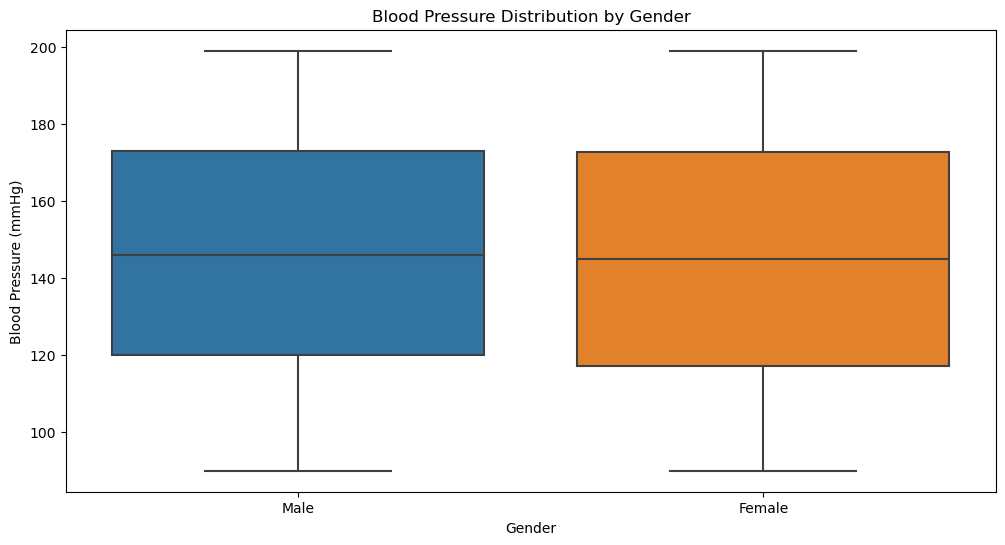

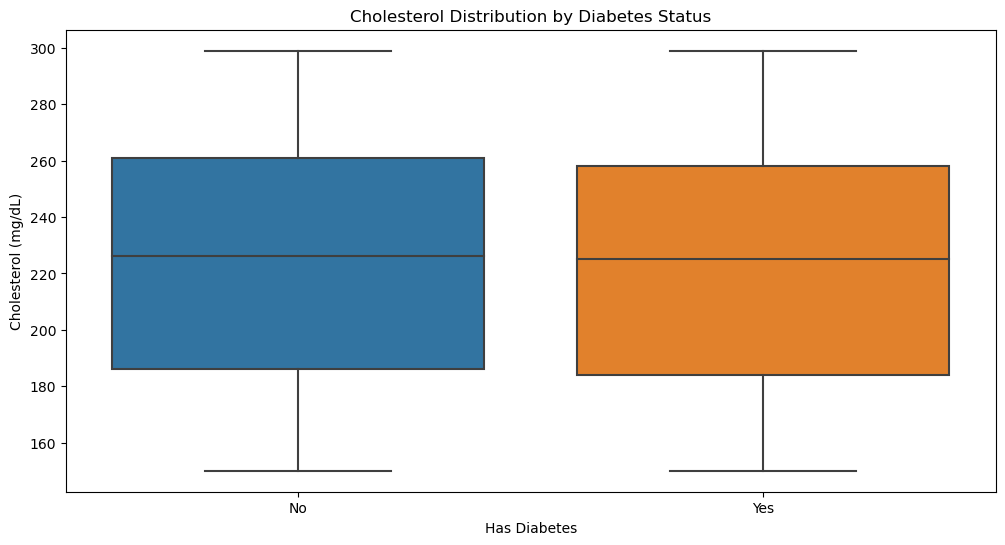

In [41]:
# Boxplot for comparison between genders
plt.figure(figsize=(12, 6))
sns.boxplot(x='Gender', y='Blood Pressure (mmHg)', data=df)
plt.title('Blood Pressure Distribution by Gender')
plt.show()

# Boxplot for comparison between patients with and without diabetes
plt.figure(figsize=(12, 6))
sns.boxplot(x='Has Diabetes', y='Cholesterol (mg/dL)', data=df)
plt.title('Cholesterol Distribution by Diabetes Status')
plt.show()


# 2. Statistical Analysis

#### 1.Statistical Tests:

Perform statistical tests to compare groups, such as the t-test for two independent samples or ANOVA for more than two groups.

In [42]:
# T-test for blood pressure between males and females

male_bp = df[df['Gender'] == 'Male']['Blood Pressure (mmHg)']
female_bp = df[df['Gender'] == 'Female']['Blood Pressure (mmHg)']
t_stat, p_val = ttest_ind(male_bp, female_bp)
print(f'T-test: statistic={t_stat}, p-value={p_val}')


T-test: statistic=0.30742153332044314, p-value=0.7585866789971364



#### 2.Linear Regression
Perform a linear regression to investigate the relationship between dependent and independent variables.

In [43]:
# Linear regression: Blood Pressure as the dependent variable

X = df[['Age', 'Cholesterol (mg/dL)']]
y = df['Blood Pressure (mmHg)']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                              OLS Regression Results                             
Dep. Variable:     Blood Pressure (mmHg)   R-squared:                       0.002
Model:                               OLS   Adj. R-squared:                 -0.000
Method:                    Least Squares   F-statistic:                    0.9866
Date:                   Fri, 09 Aug 2024   Prob (F-statistic):              0.373
Time:                           20:11:54   Log-Likelihood:                -4875.5
No. Observations:                   1000   AIC:                             9757.
Df Residuals:                        997   BIC:                             9772.
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
cons

# 3. Preparation for Predictive Modeling

#### 1. Define the categorical and numerical columns



In [48]:

categorical_features = ['Gender', 'Smoking Status', 'Chest Pain Type', 'Treatment']
numeric_features = ['Age', 'Blood Pressure (mmHg)', 'Cholesterol (mg/dL)']

#### 2. Create a preprocessing pipeline to handle both types of features



In [49]:

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),  # Standardize the numerical variables
        ('cat', OneHotEncoder(drop='first'), categorical_features)])  # Apply One-Hot Encoding to the categorical variables



#### 3. Split the data into training and testing sets



In [50]:

X = df.drop('Has Diabetes', axis=1)  # Replace 'Has Diabetes' with the correct target variable
y = df['Has Diabetes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### 4. Apply the preprocessor to the training and testing data

In [51]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)


#### 5. Train the model - Logistic Regression

In [52]:
model = LogisticRegression()
model.fit(X_train_processed, y_train)
y_pred = model.predict(X_test_processed)


#### 6. Evaluate the model

In [53]:
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

Accuracy: 0.455
              precision    recall  f1-score   support

          No       0.40      0.36      0.38        92
         Yes       0.50      0.54      0.52       108

    accuracy                           0.46       200
   macro avg       0.45      0.45      0.45       200
weighted avg       0.45      0.46      0.45       200



# 1. Result Analysis

#### Interpret the Model Output:

* Review the classification report that includes metrics like precision, recall, and F1-score. Assess the model's performance for each class.
* Consider the metrics to determine if the model is performing well or if there are areas for improvement.

#### Confusion Matrix:

* Generate and visualize a confusion matrix to better understand where the model is making mistakes.

In [54]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

##### Define the parameter grid

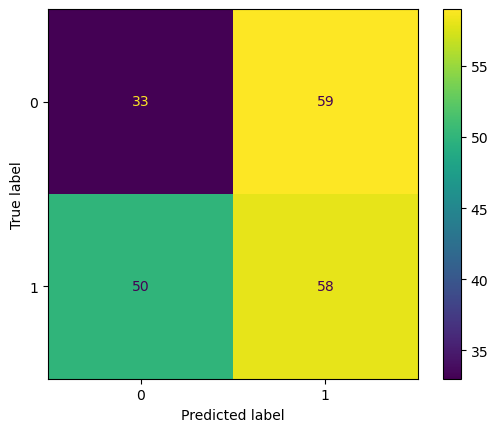

In [55]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# 2. Model Improvement

#### Hyperparameter Tuning:

* Use GridSearchCV or RandomizedSearchCV to find the best hyperparameters for your Logistic Regression model, or experiment with other machine learning algorithms.

In [58]:
from sklearn.model_selection import GridSearchCV

In [59]:
param_grid = {'C': [0.1, 1, 10, 100], 'solver': ['liblinear', 'lbfgs']}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train_processed, y_train)

print(f'Best Parameters: {grid.best_params_}')

Best Parameters: {'C': 1, 'solver': 'liblinear'}


#### Try Other Models:
 
 * Experiment with other algorithms like Random Forest, SVM, or Gradient Boosting to see if they offer better performance.

In [60]:
from sklearn.ensemble import RandomForestClassifier

##### Random Forest Classifier

In [61]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_processed, y_train)
y_pred_rf = rf_model.predict(X_test_processed)
print(f'Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf)}')

Random Forest Accuracy: 0.52


# 3. Cross-Validation

#### Cross-Validation:
* Perform cross-validation to ensure the model is not overfitting and that it generalizes well to new data.

In [67]:
from sklearn.model_selection import cross_val_score

In [68]:

scores = cross_val_score(model, X_train_processed, y_train, cv=5)
print(f'Cross-Validation - Average Accuracy: {scores.mean()}')

Cross-Validation - Average Accuracy: 0.49749999999999994


# 4. Interpretation and Reporting

#### Feature Importance:

* Identify which features contributed the most to the model's performance. This can be done by looking at the coefficients in Logistic Regression or feature importance in a Random Forest.

In [69]:
# 4. Apply the preprocessor to the training and testing data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Train the model - Logistic Regression
model = LogisticRegression()
model.fit(X_train_processed, y_train)
y_pred = model.predict(X_test_processed)

# 4.1. Interpretation - Extract the feature names after One-Hot Encoding
encoded_columns = preprocessor.transformers_[1][1].get_feature_names_out(categorical_features)
all_feature_names = numeric_features + list(encoded_columns)

# 4.2. Display feature importance
importance = model.coef_[0]
for i, v in enumerate(importance):
    print(f'Feature: {all_feature_names[i]}, Score: {v}')

# 5. Model Evaluation
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

Feature: Age, Score: 0.03808983455352359
Feature: Blood Pressure (mmHg), Score: 0.0014799672353108188
Feature: Cholesterol (mg/dL), Score: -0.03148500579941774
Feature: Gender_Male, Score: -0.16566712525500438
Feature: Smoking Status_Former, Score: 0.28129213205374975
Feature: Smoking Status_Never, Score: 0.023969526265724732
Feature: Chest Pain Type_Atypical Angina, Score: -0.13049229773434637
Feature: Chest Pain Type_Non-anginal Pain, Score: -0.0384542466731484
Feature: Chest Pain Type_Typical Angina, Score: -0.1977851043891577
Feature: Treatment_Coronary Artery Bypass Graft (CABG), Score: 0.028040416269597315
Feature: Treatment_Lifestyle Changes, Score: 0.04441065490214266
Feature: Treatment_Medication, Score: 0.15458195695598972
Accuracy: 0.455
              precision    recall  f1-score   support

          No       0.40      0.36      0.38        92
         Yes       0.50      0.54      0.52       108

    accuracy                           0.46       200
   macro avg       0.45

In [71]:
from sklearn.ensemble import GradientBoostingClassifier

# Treinamento do Modelo - Gradient Boosting
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train_processed, y_train)
y_pred_gb = gb_model.predict(X_test_processed)

# Avaliação do Modelo
print(f'Gradient Boosting Accuracy: {accuracy_score(y_test, y_pred_gb)}')
print(classification_report(y_test, y_pred_gb))


Gradient Boosting Accuracy: 0.455
              precision    recall  f1-score   support

          No       0.41      0.45      0.43        92
         Yes       0.50      0.46      0.48       108

    accuracy                           0.46       200
   macro avg       0.45      0.45      0.45       200
weighted avg       0.46      0.46      0.46       200



In [72]:
from sklearn.svm import SVC

# Treinamento do Modelo - SVM
svm_model = SVC()
svm_model.fit(X_train_processed, y_train)
y_pred_svm = svm_model.predict(X_test_processed)

# Avaliação do Modelo
print(f'SVM Accuracy: {accuracy_score(y_test, y_pred_svm)}')
print(classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.45
              precision    recall  f1-score   support

          No       0.38      0.33      0.35        92
         Yes       0.49      0.56      0.52       108

    accuracy                           0.45       200
   macro avg       0.44      0.44      0.44       200
weighted avg       0.44      0.45      0.44       200

